<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework3_part3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.3 (28 points)

**Learning objectives:**

In this assignment, we will learn about:

*   K-means clustering
*   Expectation maximization



---

## Part 1
Load the same libraries that we used in previous homeworks.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `import pandas as pd`

Load the following two libraries as well as follows:

`from sklearn.cluster import KMeans`

`from sklearn.datasets import make_blobs`


As always, now is also a good time to set the default font size to 16.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
plt.rcParams.update({'font.size': 16})

---
## Part 2 (2 points)

First, create some data to cluster.  We'll use the `make_blobs` function for this purpose.  Create a dataset using the following parameters:

`n_samples=300`

`centers=4`

`cluster_std=0.7`

`random_state=0`

Use the `matplotlib` method `scatter` to display the datapoints.  Ensure that the x- and y- axes have equal scales as in *Homework 3.1*.


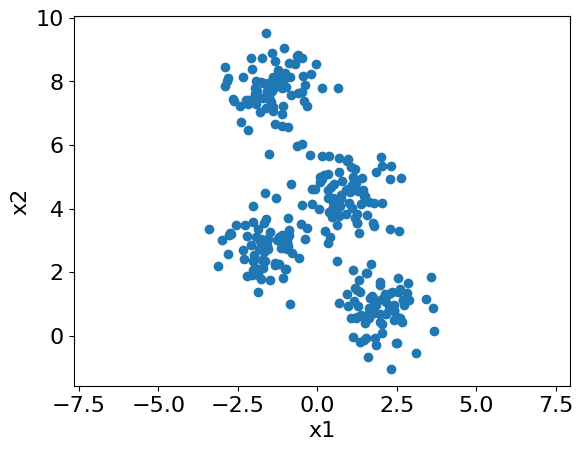

In [63]:
d,_= make_blobs(n_samples=300,centers=4,cluster_std=0.7,random_state=0)
plt.scatter(d[:, 0], d[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

OK!  Lets cluster these data using k-means.  

---
## Part 3 (2 points)

*   Since we know that we created a dataset with 4 blobs, we'll take k=4.
*   Initialize the four cluster centers.  Create a 4x2 array containing the location of the 4 cluster centroids.  In principle, we could initialize the with random numbers, but we'll use the following points:

(1,  2)
(1,  1)
(-1, 2)
(-1, 1)

*   Plot the data in blue and the initial cluster centers in red.


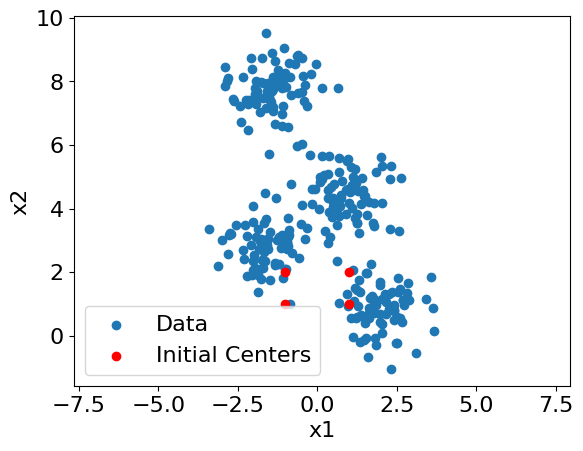

In [68]:
cluster_centers = np.array([[1, 2],
                             [1, 1],
                             [-1, 2],
                             [-1, 1]])

plt.scatter(d[:, 0], d[:, 1], label='Data')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', label='Initial Centers')

plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.legend()
plt.show()

---
## Part 4 (4 points)

Write a function, called `clusterAssignment`, that finds the closest centroid to a datapoint.  This function should accept a data point and the location of the cluster centroids as inputs and should return the cluster number whose associated centroid is closest to the data point.

This function will be used to determine the cluster assignments, $r_{n,k}$, based on assumptions of the cluster centroids, $\mu_k$.

In [69]:
def clusterAssignment(data_point, centroids):
    distances = np.linalg.norm(centroids - data_point, axis=1)
    return np.argmin(distances)

data_point = np.array([0, 0])
centroids = np.array([[1, 2],
                      [1, 1],
                      [-1, 2],
                      [-1, 1]])
cluster_number = clusterAssignment(data_point, centroids)
print(f"Cluster number for data point {data_point}: {cluster_number}")


Cluster number for data point [0 0]: 1


---
## Part 5 (4 points)

Write a function, `calculateCentroids` that updates the cluster centroids, $\mu_k$, given cluster assignments, $r_{n,k}$.  This function should accept an Nx2 array of points and an Nx1 array of cluster assignments and return a kx2 array containing the cluster centroids.

In [73]:
def calculateCentroids(points, cluster_assignments, k):

    centroids = np.zeros((k, points.shape[1]))
    for cluster_idx in range(k):
        cluster_points = points[cluster_assignments == cluster_idx]
        if len(cluster_points) > 0:
            centroids[cluster_idx] = np.mean(cluster_points, axis=0)
    return centroids

points = np.array([[0, 0],
                   [1, 1],
                   [2, 2],
                   [5, 5],
                   [6, 6]])
cluster_assignments = np.array([0, 1, 1, 0, 1])
k = 4
centroids = calculateCentroids(points, cluster_assignments, k)
print("Updated centroids:\n", centroids)


Updated centroids:
 [[2.5 2.5]
 [3.  3. ]
 [0.  0. ]
 [0.  0. ]]


---
## Part 6 (2 points)

Use `clusterAssignment` to find the cluster associated with every data point, given our initial guesses of cluster centroids.  Use a list comprehension.

Use the `scatter` method to plot the data points and cluster centroids, as shown below.  We use `scatter` here instead of `plot` because it lets us define the color of every point plotted using the argument `c`.  For example, you could set `c=clusters`, where `clusters` are your cluster assignments, to set the color of each point to be an integer from 0 to 3.  In this case, integer cluster assignments will be mapped automatically to colors by `scatter` using the default colormap.

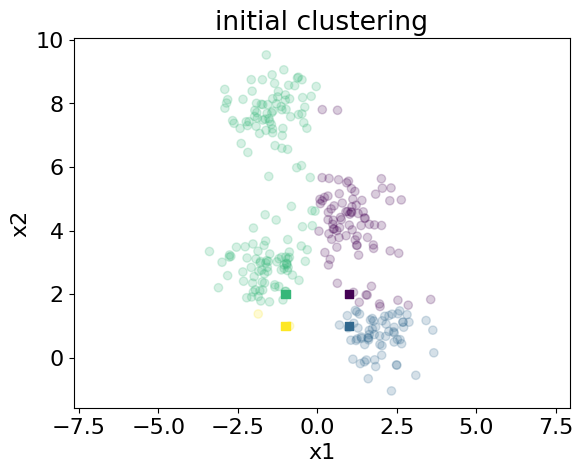

In [78]:
initial_centroids = np.array([[1, 2],
                               [1, 1],
                               [-1, 2],
                               [-1, 1]])

# Find the cluster associated with every data point
cluster_assignments = [clusterAssignment(data_point, initial_centroids) for data_point in d]

plt.scatter(d[:, 0], d[:, 1], c=cluster_assignments,alpha=0.2)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1],c=[0,1,2,3], marker ='s')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('initial clustering')
plt.show()

---
## Part 7 (4 points)

Now, let's write the k-means algorithm with the functions we wrote.

*   Write a `while` loop to repeat the steps of the k-means algorithm.  This loop should execute until the centroids remain the same on consecutive iterations.

Inside the `while` loop, do the following:

*   Using the function `clusterAssignment`, find the cluster whose centroid is closest to each datapoint (E-step).
*   Using the function `calculateCentroids`, update the cluster centroids based on the current cluster assignments (M-step).
*   Check whether the updated centroids are all identical the centroids defined on the previous iteration of the loop (or, on the first iteration, the initial conditions).  If they are identical, do not continue the while loop.
*   As in Part 6, use `scatter` to display the data points and cluster centroids, colored by their cluster assignment.

Within the while loop, also calculate the value of the k-means objective function, J, after each E-step and each M-step and make a plot of J as it converges.

Maximum iterations reached. Exiting loop.


Text(0.5, 1.0, 'Ending clusters')

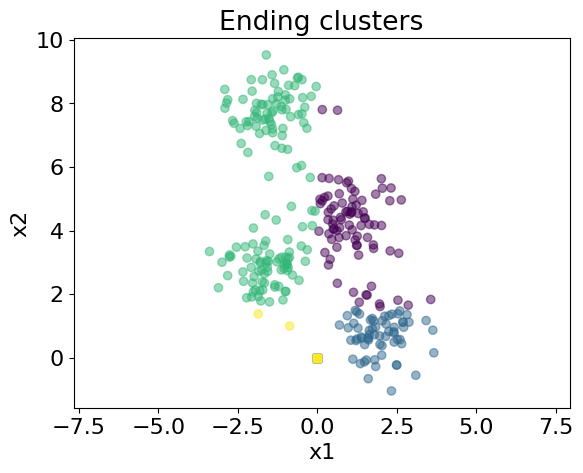

In [91]:
converged = False #initial condition
centroids = initial_centroids
prev_centroids = None
max_iter = 10
iteration = 0
J_values = []
k=4
# Run k-means algorithm
while not converged:
  #E-setp
    cluster_assignments = [clusterAssignment(data_point, centroids) for data_point in d]
    prev_centroids = centroids
    #M-setp
    new_centroids = calculateCentroids(d, cluster_assignments, k)
    if iteration >= max_iter:
        print("Maximum iterations reached. Exiting loop.")
        break

    J = np.sum(np.min(np.linalg.norm(d[:, np.newaxis] - new_centroids, axis = 2), axis = 1))
    J_values.append(J)
    iteration += 1
    # print(iteration)

plt.scatter(d[:, 0], d[:, 1],c=cluster_assignments,alpha=0.5)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c=[1,2,3,4], marker='s')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Ending clusters')





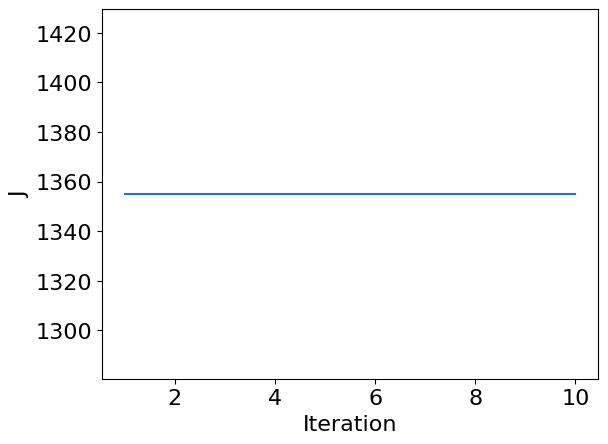

In [103]:

plt.plot(range(1, iteration+1), J_values)
plt.xlabel('Iteration')
plt.ylabel('J')

plt.show()

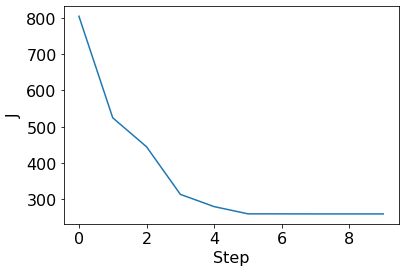

---
## Part 8 (2 points)

Now, use scikit-learn to perform k-means clustering.  

*   Import KMeans from sklearn.cluster
*   Create a KMeans object and set `n_clusters=4` and `init=c_init`.  We also only want to run the althorigthm once with a single set of initial conditions, and so set `n_init=1`.
*   Use the `fit` and `predict` methods to run k-means on your data.
*   Plot the data and centroids and color them according to cluster membership as in **Part 7**.




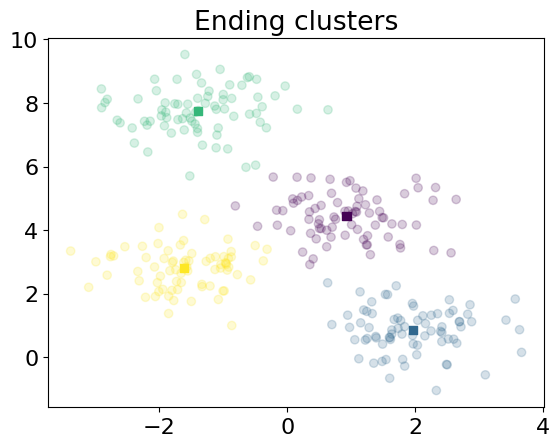

In [101]:
# from sklearn.cluster import KMeans
km =KMeans(n_clusters = 4,init = initial_centroids,n_init=1)
km.fit(d)
pred =km.predict(d)
np.shape(pred)
centroids_kmeans = km.cluster_centers_

plt.scatter(d[:, 0], d[:, 1], c = pred,alpha=0.2)
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c = [0,1,2,3], marker = 's')
plt.title('Ending clusters')
plt.show()

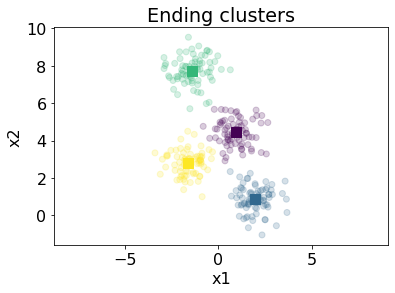


<font color='red'>**SHORT ANSWER (4 points):**Why do we use an iterative algorithm (similar to Expectation-Maximization) to determine cluster assignments in k-Means?</font>  

Unlike hierarchical clustering, k-Means does not have a closed-form solution for determining cluster assignments. The assignment of data points to clusters depends on the positions of the centroids, which are updated iteratively.

k-Means aims to minimize the within-cluster variance, which is an optimization problem. The assignment of data points to clusters and the update of cluster centroids are performed iteratively to progressively decrease this objective function until convergence.

The algorithm alternates between two main steps: the Expectation step (E-step), where data points are assigned to the nearest cluster centroid based on the current centroids, and the Maximization step (M-step), where centroids are updated based on the current cluster assignments. This iterative process continues until convergence, ensuring that the algorithm refines its solution with each iteration.


<font color='red'>**SHORT ANSWER (4 points):** Describe what you would need to modify in the code you've written (not the sklearn version) to cluster these data using a Gaussian Mixture Model instead of k-Means.</font>  

GMM allows for more flexible cluster shapes by modeling each cluster as a Gaussian distribution with its own mean and covariance matrix. This allows GMM to capture elliptical, elongated, or rotated clusters.
It assigns probabilities of cluster membership to each data point, allowing for soft cluster assignments. Each data point can belong to multiple clusters with varying probabilities.
It uses the Expectation-Maximization (EM) algorithm, which iteratively estimates the parameters (mean, covariance, and mixing coefficients) of the Gaussian distributions representing each cluster. In the E-step, it calculates the probability of each data point belonging to each cluster. In the M-step, it updates the parameters based on these probabilities which is different from k-means where we update the rank of the cluster.
It maximizes the log-likelihood of the data given the model parameters, which accounts for both the likelihood of data points under each cluster and the mixing coefficients.

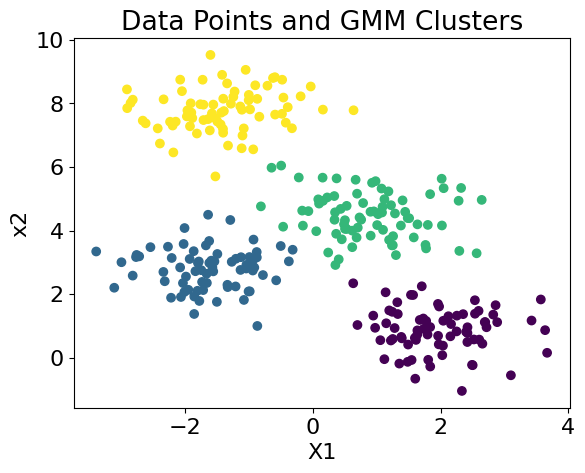

In [102]:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0)

gmm.fit(d)

cluster_assignments = gmm.predict(d)

# Plot the data points colored according to their predicted cluster assignments

plt.scatter(d[:, 0], d[:, 1], c=cluster_assignments, label='Data')
plt.xlabel('X1')
plt.ylabel('x2')
plt.title('Data Points and GMM Clusters')
plt.show()
